In [160]:
import eia
from collections import defaultdict
import pandas as pd
import plotly.express as px

In [325]:
df = eia.loaders.load_dataframe(data="electric-power-operational-data")

/Users/nehamittal/data/eia-py/data/csv/electric-power-operational-data_data.csv


In [326]:
df['population'] = 0
df['Cancer_deaths'] = 0

In [327]:
pop_df = pd.read_csv("US_population.csv")

In [328]:
for j in range(len(pop_df)):
    for i in range(len(df)):
        if df.loc[i,"stateDescription"] == pop_df.loc[j,"States"]:
            df.loc[i, "population"] = int(pop_df.loc[j,"Annual Residential Population"].replace(',',''))
            df.loc[i, "Cancer_deaths"] = pop_df.loc[j,"Cancer Deaths"]

In [329]:
df2 = df.loc[df["sectorDescription"] == "Electric Power", :]
df3 = df.loc[df["sectorDescription"] == "All Sectors", :]
df4 = df.loc[df["sectorDescription"] == "Coal Consumption", :]

In [330]:
ash_content = pd.DataFrame(df2[["location", "ash-content", "generation", "population", "Cancer_deaths"]].groupby(["location", "population", "Cancer_deaths"]).sum())

In [331]:
ash_content = ash_content.reset_index()

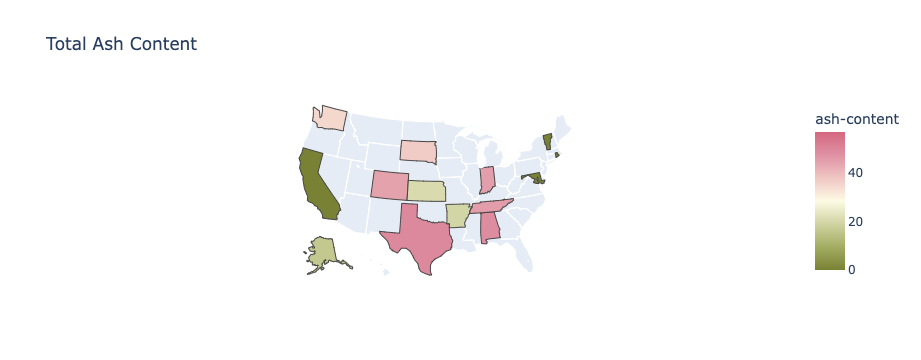

In [332]:
try:
    fig = px.choropleth(ash_content, 
                        locations = 'location',
                        locationmode = 'USA-states',
                        scope = 'usa',
                        color = 'ash-content',
                        hover_name = 'location',
                        hover_data = ['location', 'ash-content'],
                        range_color = [0,ash_content["ash-content"].max()],
                        color_continuous_scale = 'armyrose',
                        title = 'Total Ash Content')
    fig.show()
except:
    pass

In [333]:
ash_content["ash_by_gen"] = ash_content["ash-content"]/ash_content["generation"]

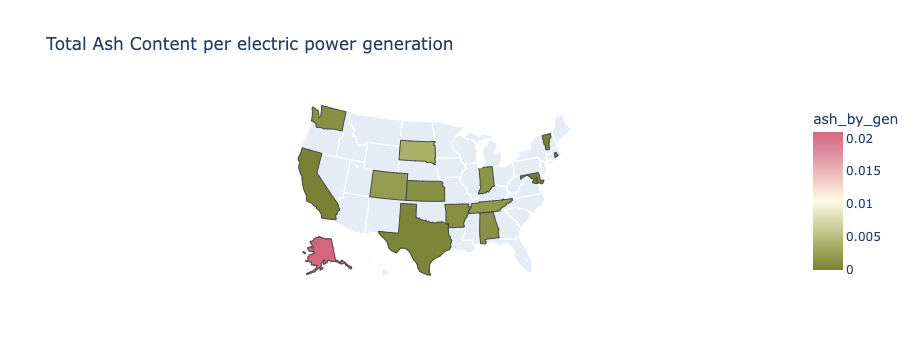

In [362]:
try:
    fig = px.choropleth(ash_content, 
                        locations = 'location',
                        locationmode = 'USA-states',
                        scope = 'usa',
                        color = 'ash_by_gen',
                        hover_name = 'location',
                        hover_data = ['location','ash_by_gen', 'ash-content'],
                        range_color = [0,ash_content["ash_by_gen"].max()],
                        color_continuous_scale = 'armyrose',
                        title = 'Total Ash Content per electric power generation')
    fig.show()
except:
    pass

In [335]:
ash_content["ash_per_capita"] = ash_content["ash-content"]/ash_content["population"]

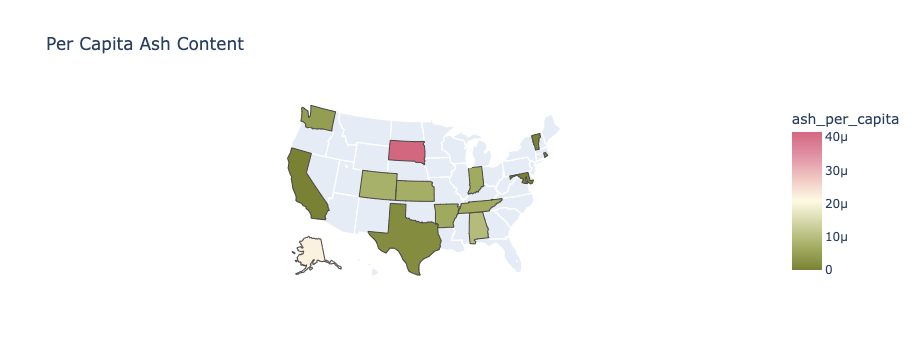

In [364]:
try:
    fig = px.choropleth(ash_content, 
                        locations = 'location',
                        locationmode = 'USA-states',
                        scope = 'usa',
                        color = 'ash_per_capita',
                        hover_name = 'location',
                        hover_data = ['location','ash_per_capita', 'ash-content'],
                        range_color = [0,ash_content["ash_per_capita"].max()],
                        color_continuous_scale = 'armyrose',
                        title = 'Per Capita Ash Content')
    fig.show()
except:
    pass

In [349]:
heat_content = pd.DataFrame(df2[["location", "heat-content", "generation", "population"]].groupby(["location", "population"]).sum())

In [350]:
heat_content = heat_content.reset_index()

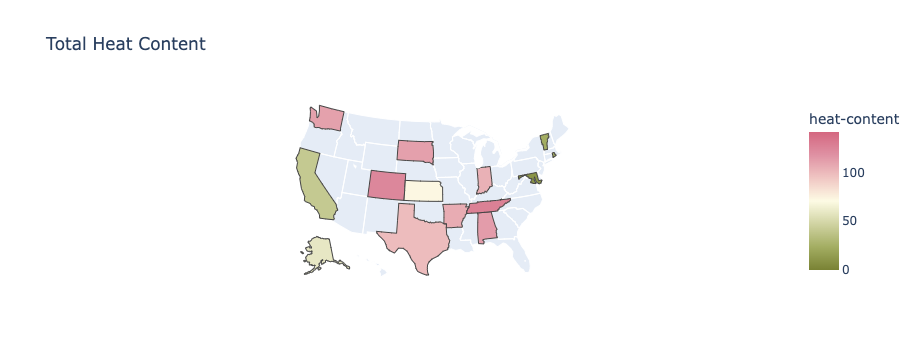

In [351]:
try:
    fig = px.choropleth(heat_content, 
                        locations = 'location',
                        locationmode = 'USA-states',
                        scope = 'usa',
                        color = 'heat-content',
                        hover_name = 'location',
                        hover_data = ['location', 'heat-content'],
                        range_color = [0,heat_content["heat-content"].max()],
                        color_continuous_scale = 'armyrose',
                        title = 'Total Heat Content')
    fig.show()
except:
    pass

In [352]:
heat_content["heat_by_gen"] = heat_content["heat-content"]/heat_content["generation"]

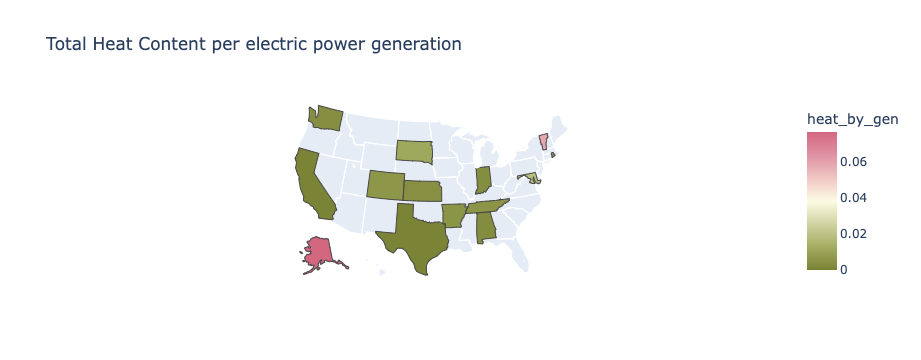

In [356]:
try:
    fig = px.choropleth(heat_content, 
                        locations = 'location',
                        locationmode = 'USA-states',
                        scope = 'usa',
                        color = 'heat_by_gen',
                        hover_name = 'location',
                        hover_data = ['location','heat_by_gen', 'heat-content'],
                        range_color = [0, heat_content["heat_by_gen"].max()],
                        color_continuous_scale = 'armyrose',
                        title = 'Total Heat Content per electric power generation')
    fig.show()
except:
    pass

In [354]:
heat_content["heat_per_capita"] = heat_content["heat-content"]/heat_content["population"]

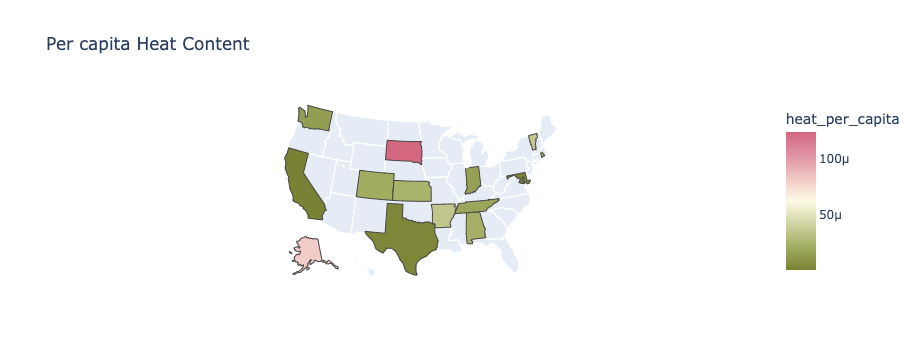

In [365]:
try:
    fig = px.choropleth(heat_content, 
                        locations = 'location',
                        locationmode = 'USA-states',
                        scope = 'usa',
                        color = 'heat_per_capita',
                        hover_name = 'location',
                        hover_data = ['location','heat_per_capita', 'heat-content'],
                        range_color = [0, heat_content["heat_per_capita"].max()],
                        color_continuous_scale = 'armyrose',
                        title = 'Per capita Heat Content')
    fig.show()
except:
    pass

In [357]:
sulfur_content = pd.DataFrame(df2[["location", "sulfur-content", "generation", "population"]].groupby(["location", "population"]).sum())

In [358]:
sulfur_content = sulfur_content.reset_index()

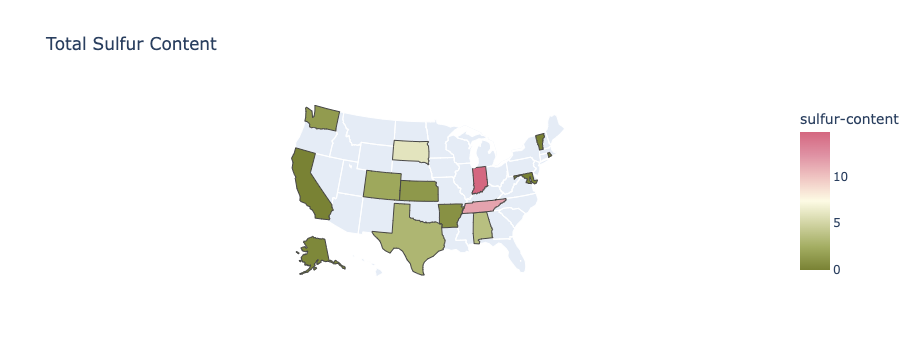

In [344]:
try:
    fig = px.choropleth(sulfur_content, 
                        locations = 'location',
                        locationmode = 'USA-states',
                        scope = 'usa',
                        color = 'sulfur-content',
                        hover_name = 'location',
                        hover_data = ['location', 'sulfur-content'],
                        range_color = [0,sulfur_content["sulfur-content"].max()],
                        color_continuous_scale = 'armyrose',
                        title = 'Total Sulfur Content')
    fig.show()
except:
    pass

In [345]:
sulfur_content["sulfur_by_gen"] = sulfur_content["sulfur-content"]/sulfur_content["generation"]

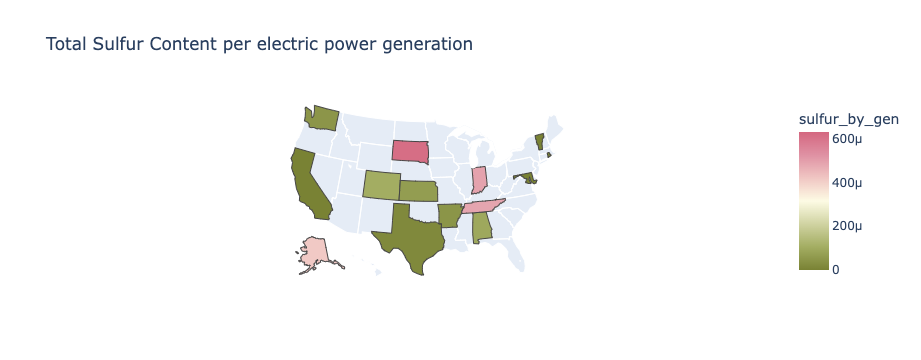

In [346]:
try:
    fig = px.choropleth(sulfur_content, 
                        locations = 'location',
                        locationmode = 'USA-states',
                        scope = 'usa',
                        color = 'sulfur_by_gen',
                        hover_name = 'location',
                        hover_data = ['location','sulfur_by_gen', 'sulfur-content'],
                        range_color = [0, sulfur_content["sulfur_by_gen"].max()],
                        color_continuous_scale = 'armyrose',
                        title = 'Total Sulfur Content per electric power generation')
    fig.show()
except:
    pass

In [359]:
sulfur_content["sulfur_per_capita"] = sulfur_content["sulfur-content"]/sulfur_content["population"]

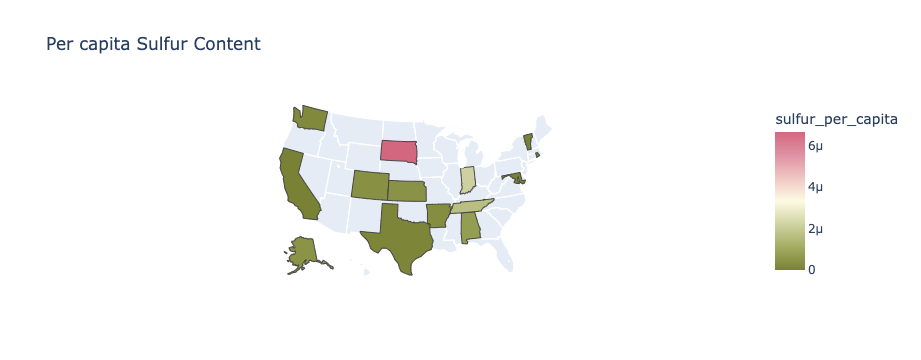

In [361]:
try:
    fig = px.choropleth(sulfur_content, 
                        locations = 'location',
                        locationmode = 'USA-states',
                        scope = 'usa',
                        color = 'sulfur_per_capita',
                        hover_name = 'location',
                        hover_data = ['location','sulfur_per_capita', 'sulfur-content'],
                        range_color = [0, sulfur_content["sulfur_per_capita"].max()],
                        color_continuous_scale = 'armyrose',
                        title = 'Per capita Sulfur Content')
    fig.show()
except:
    pass

In [313]:
df2.loc[(df["location"] == "SD") & (df["sectorDescription"] == "Electric Power"), ["fuelTypeDescription","ash-content"]]

,fuelTypeDescription,ash-content
0,all renewables,0.0
1,biomass,0.0
2,"coal, excluding waste coal",5.2
3,all coal products,5.2
4,distillate fuel oil,0.0
5,fossil fuels,5.2
97,all fuels,0.0
143,biomass,0.0
144,other renewables,0.0
145,other,0.0
